<img src="logos/img.png" width="80%">

# Bootcamp project

## Case Study:
<h4>Dataset for COVID-19 Pandemic in Saudi Arabia</h4>

<hr style="width:220px; margin: auto; float: left" />

<div style="clear: both"></div>

<img src='logos/ssds.jpg' />
<h3>Saudi Society for Data Science</h3>
<h3>Data Science & Big Data Bootcamp</h3>


<div style="clear: both"></div>
<hr style="width:420px; margin: auto; float: left" />

<div style="clear: both"></div>
<div style="clear: both"></div>
<hr style="width:420px; margin: auto; float: left" />

<div style="clear: both"></div>




<h3>Abdulrahman Alazwari</h3>
<a href="https://github.com/azwri/">
    <img src='logos/github-logo.png' width='30'  />
</a><span> &nbsp;&nbsp;&nbsp; </span><a href="https://www.linkedin.com/in/abdulrahman-alazwari/">
    <img src='logos/linkedin-logo.png' width='30' />
</a><span> &nbsp;&nbsp;&nbsp; </span><a href="https://twitter.com/Al_Azwari">
    <img src='logos/twitter-logo.png' width='30' />
</a><span> &nbsp;&nbsp;&nbsp; </span><a href = "mailto: aazwri@gmail.com">
    <img src='logos/gmail-logo.png' width='40' />
</a>
<br><br>
<div style="clear: both"></div>
<hr style="width:220px; margin: auto; float: left" />

<div style="clear: both"></div>







## Import the libraries
> if error download the below<br>
>> !pip3 install arabic-reshaper<br>
>> !pip3 install python-bidi<br>
>> !pip3 install folium<br>
>> !pip3 install wordcloud<br>
>> !pip3 install pillow<br>

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pylab as plt
import folium
import arabic_reshaper
from bidi.algorithm import get_display

# !pip3 install arabic-reshaper
# !pip3 install python-bidi
# !pip3 install folium
# !pip3 install wordcloud
# !pip3 install pillow

%matplotlib inline
# disable chained assignments
pd.options.mode.chained_assignment = None 

Matplotlib created a temporary config/cache directory at /var/folders/bg/xhkqnc5116507zhbsvbfmz7w0000gn/T/matplotlib-a4fdcqhc because the default path (/Users/az/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Gather Data

Download the CSV file from [source link](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-coronavirus-disease-covid-19-situation/export/?sort=-daily_accumulative&dataChart=%3D&disjunctive.daily_accumulative=&flg=ar&disjunctive.city&disjunctive.daily_cumulative&disjunctive.indicator&disjunctive.event&disjunctive.region&disjunctive.city_en&disjunctive.region_en).<br/>
* The csv file is more than 19 GB right now, June 2021.<br/>
* First download the file and read it by `pandas.read_csv` method and pass argument `;` to `sep` parameter, because they format the csv file by `;`.<br/>
* Second use a tricky way to lower the size of CSV file to be about 2 GB:
> Save the file by `to_csv` method and pass argument `gzip` extension to `compression` parameter to compress the file and lower the size, and importantly pass `False` to index parameter to exclude the index column.<br/>
> For memory reason delete the orginal CSV file by `os.remove` method.<br/>
> Read the new file by `pandas.read_csv` method and pass argument `gzip` to `compression` parameter.<br/>

In [2]:
# csv_file = pd.read_csv('saudi-arabia-coronavirus-disease-covid-19-situation.csv', sep=';')
# csv_file.to_csv('sa-covid-19-v1.csv', compression='gzip', index=False)
# os.remove('saudi-arabia-coronavirus-disease-covid-19-situation.csv')

**Read CSV file and assign it to `df`os.remove variable**

In [3]:
df = pd.read_csv('sa-covid-19-v1.csv', compression='gzip')

## Assess Data

> Use `head` method to have a look on the first 5 observations.<br/>
> Use `columns.values` property to return the columns names.<br/>
> Use `info` meethod to see missing values and data types of each feature.<br/>
> Also we can use `dtype` property to see the data types.<br/>
> Summary statistics on numeric values by using `describe` method.<br/>

In [4]:
df.head()

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Daily,Recoveries,2021-06-12,NaN,Total,Total,1133
1,Daily,Recoveries,2021-06-15,NaN,Total,Total,932
2,Cumulative,Recoveries,2020-03-13,NaN,Al Qatif,Eastern Region,1
3,Cumulative,Recoveries,2020-03-16,NaN,Ad Dammam,Eastern Region,1
4,Cumulative,Recoveries,2020-03-19,NaN,Ad Dammam,Eastern Region,3


In [5]:
df.columns.values

array(['Daily / Cumulative', 'Indicator', 'Date', 'Event', 'City',
       'Region', 'Cases (person)'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339572 entries, 0 to 339571
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Daily / Cumulative  339572 non-null  object
 1   Indicator           339572 non-null  object
 2   Date                339572 non-null  object
 3   Event               1900 non-null    object
 4   City                339572 non-null  object
 5   Region              339572 non-null  object
 6   Cases (person)      339572 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 18.1+ MB


In [7]:
df.dtypes

Daily / Cumulative    object
Indicator             object
Date                  object
Event                 object
City                  object
Region                object
Cases (person)         int64
dtype: object

In [8]:
df.describe()

,Cases (person)
count,3.395720e+05
mean,1.294150e+04
std,3.827142e+05
min,-9.000000e+00
25%,4.000000e+00
50%,3.400000e+01
75%,2.550000e+02
max,2.071260e+07


## Clean Data
> Make a data frame copy to manipulate the data<br>
> Filter on `daliy` cases from `Daily / Cumulative` column<br>
> Drop attributes, which we do not need `Daily / Cumulative` and `Event`<br>
> Convert columns names to lower case to use it as attribute when call it<br>
> Rename last attribute `cases (person)` to `cases`<br>
> Drop unnecessary record (“Total”)
> Assign total_record variable to `Total` record and total_record_index variable to indexes of total_record<br>
> Check missing values, and drip them or change them<br>
> Chenge data type of case attribute and chenge data type of date attribute<br>

In [9]:
# make copy from the orginal dataframe
df_copy = df.copy()

In [10]:
df_copy.head()

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Daily,Recoveries,2021-06-12,NaN,Total,Total,1133
1,Daily,Recoveries,2021-06-15,NaN,Total,Total,932
2,Cumulative,Recoveries,2020-03-13,NaN,Al Qatif,Eastern Region,1
3,Cumulative,Recoveries,2020-03-16,NaN,Ad Dammam,Eastern Region,1
4,Cumulative,Recoveries,2020-03-19,NaN,Ad Dammam,Eastern Region,3


In [11]:
# Filter on `daliy` cases from `Daily / Cumulative` column
df_copy = df[df_copy['Daily / Cumulative'] == 'Daily']

In [12]:
# Drop attributes, which we do not need `Daily / Cumulative` and `Event`
df_copy.drop(['Daily / Cumulative', 'Event'], axis=1, inplace=True)

In [13]:
# check the columns after drop
df_copy.columns.values

array(['Indicator', 'Date', 'City', 'Region', 'Cases (person)'],
      dtype=object)

In [14]:
# convert columns names to lower case to use it as attribute when call it
# rename last attribute `cases (person)` to `cases`
df_copy.rename(columns=lambda col: col.lower(), inplace=True)
df_copy.rename(columns={'cases (person)': 'cases'}, inplace=True)

In [15]:
# check the columns after convert to lower case and rename `cases (person)` to `case`
df_copy.columns.values

array(['indicator', 'date', 'city', 'region', 'cases'], dtype=object)

In [16]:
# drop unnecessary record (“Total”)
# assign total_record variable to `Total` record and total_record_index variable to indexes of total_record
# print(how many record with total value)
total_record = df_copy[df_copy.city == 'Total']
total_record_index = total_record.index.tolist()
len(total_record_index)

1846

In [17]:
# drop the `Total` record
df_copy.drop(total_record_index, axis=0, inplace=True)

In [18]:
# check the data frame after drop `Total` records
df_copy[df_copy.city == 'Total']

,indicator,date,city,region,cases


In [19]:
# check missing values
df_copy.isnull().sum()

indicator    0
date         0
city         0
region       0
cases        0
dtype: int64

In [20]:
# check format
df_copy.dtypes

indicator    object
date         object
city         object
region       object
cases         int64
dtype: object

In [21]:
# chenge data type of case attribute and chenge data type of date attribute, then check format again
df_copy.cases.astype('int')
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy.dtypes

indicator            object
date         datetime64[ns]
city                 object
region               object
cases                 int64
dtype: object

## Save a New Data Frame after Changing, one normal and the other is compressed

In [22]:
df_copy.to_csv('sa-covid-19-v2.csv', index=False)
df_copy.to_csv('sa-covid-19-v2-compressed.csv', index=False, compression='gzip')

## Descriptive Statistics: Indicator vs. Cases, then:
> ### Split by indicator
>> ### make four data frames for each


In [23]:
df_copy.indicator.value_counts()

Cases          34766
Recoveries     33578
Mortalities     3952
Name: indicator, dtype: int64

In [24]:
cases = df_copy.query("indicator == 'Cases'").reset_index(drop=True)
recoveries = df_copy.query("indicator == 'Recoveries'").reset_index(drop=True)
active = df_copy.query("indicator == 'Active'").reset_index(drop=True)
mortalities = df_copy.query("indicator == 'Mortalities'").reset_index(drop=True)

In [25]:
cases.head()

,indicator,date,city,region,cases
0,Cases,2021-05-01,Al Khafji,Eastern Region,6
1,Cases,2021-05-01,Al ʻIs,Al Madinah Al Munawwarah,2
2,Cases,2021-05-01,Ad DirʻIyyah,Ar Riyad,1
3,Cases,2021-05-01,Al Kharj,Ar Riyad,25
4,Cases,2021-05-01,Al Mubarraz,Eastern Region,23


## Grouping Data:
> ### Indicator vs.Region vs. Cases

In [26]:
df_copy.groupby(['indicator', 'region']).sum()

cases
indicator   region                          
Cases       Al Bahah                    5768
            Al Jawf                     2135
            Al Madinah Al Munawwarah   35407
            Al Qaseem                  17536
            Ar Riyad                  113798
            Aseer                      33032
            Eastern Region            104642
            Hail                        9500
            Jazan                      15763
            Makkah Al Mukarramah      113882
            Najran                      8109
            Northern Borders            4055
            Tabuk                       7096
Mortalities Al Bahah                      80
            Al Jawf                      108
            Al Madinah Al Munawwarah     259
            Al Qaseem                    257
            Ar Riyad                    1435
            Aseer                        583
            Eastern Region              1130
            Hail                         178
            Jazan                        546
            Makkah Al Mukarramah        2761
            Najran                       100
            Northern Borders             105
            Tabuk                         93
Recoveries  Al Bahah                    5521
            Al Jawf                     1991
            Al Madinah Al Munawwarah   34213
            Al Qaseem                  16782
            Ar Riyad                  110897
            Aseer                      31508
            Eastern Region            101883
            Hail                        9167
            Jazan                      14560
            Makkah Al Mukarramah      107321
            Najran                      7768
            Northern Borders            3803
            Tabuk                       6794

# Binning:
> I choose this websit to make levels as below
https://www.cdc.gov/coronavirus/2019-ncov/travelers/how-level-is-determined.html

<img src="logos/levels.png" />


### make function for binning

In [27]:
# this funcation take one parameter then return level depending on the conditions below
def level(val):
    if val < 49:
        return 'LOW'
    elif val < 99:
        return 'MODERATE'
    elif val <= 500:
        return 'HIGH'
    else:
        return 'VERY HIGH'

In [28]:
# Add new columns to the cases data frame for binning
# Below, pass the function level to apply function
# apply function will put bin for each record

In [29]:
cases['cases_binned'] = cases.cases.apply(level)

In [30]:
cases.head()

,indicator,date,city,region,cases,cases_binned
0,Cases,2021-05-01,Al Khafji,Eastern Region,6,LOW
1,Cases,2021-05-01,Al ʻIs,Al Madinah Al Munawwarah,2,LOW
2,Cases,2021-05-01,Ad DirʻIyyah,Ar Riyad,1,LOW
3,Cases,2021-05-01,Al Kharj,Ar Riyad,25,LOW
4,Cases,2021-05-01,Al Mubarraz,Eastern Region,23,LOW


# Visualization

In [31]:
cases.cases_binned.value_counts()

LOW          32963
HIGH           888
MODERATE       867
VERY HIGH       48
Name: cases_binned, dtype: int64

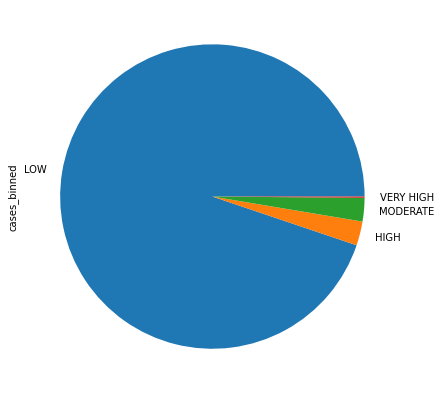

In [32]:
# binning for cases
cases.cases_binned.value_counts().plot(kind='pie', figsize=(10, 7))
plt.show()

### Line Plot
> #### Use line plot to draw a line for every week and only “Cases” Parameters: Every Week + Indicator: Cases

In [33]:
cases['week'] = cases['date'].map(lambda x: x.isocalendar()[1])
cases['month'] = pd.DatetimeIndex(cases['date']).month
cases['year'] = cases['date'].map(lambda x: x.isocalendar()[0])

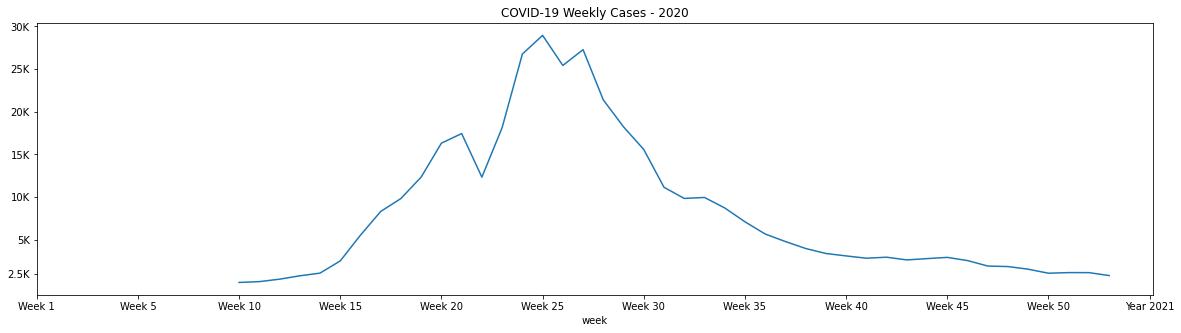

In [34]:

cases[cases.year == 2020].groupby('week').sum()['cases'].sort_index().plot(figsize=(20, 5))
plt.yticks([ 1000, 5000, 10000, 15000, 20000, 25000, 30000], [ '2.5K', '5K', '10K', '15K', '20K', '25K', '30K'])
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55], 
           ['Week 1', 'Week 5', 'Week 10', 'Week 15', 'Week 20', 'Week 25', 'Week 30', 'Week 35', 'Week 40', 'Week 45', 'Week 50','Year 2021'])
plt.title("COVID-19 Weekly Cases - 2020")
plt.show()

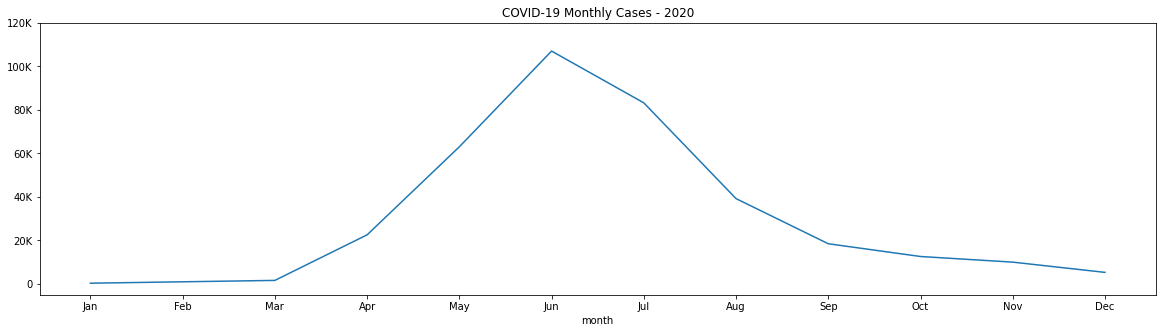

In [35]:
cases[(cases.year == 2020) & (cases.month.notna())].groupby('month').sum()['cases'].sort_index().plot(figsize=(20, 5))
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['0', '20K', '40K', '60K', '80K', '100K', '120K'])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
plt.title("COVID-19 Monthly Cases - 2020")
plt.show()

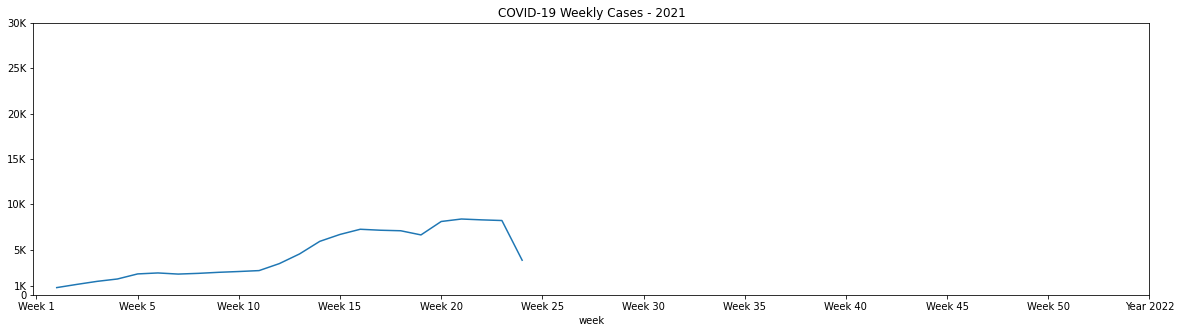

In [36]:

cases[cases.year == 2021].groupby('week').sum()['cases'].sort_index().plot(figsize=(20, 5))
plt.yticks([0, 1000, 5000, 10000, 15000, 20000, 25000, 30000], ['0', '1K', '5K', '10K', '15K', '20K', '25K', '30K'])
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55], 
           ['Week 1', 'Week 5', 'Week 10', 'Week 15', 'Week 20', 'Week 25', 'Week 30', 'Week 35', 'Week 40', 'Week 45', 'Week 50','Year 2022'])
plt.title("COVID-19 Weekly Cases - 2021")
plt.show()

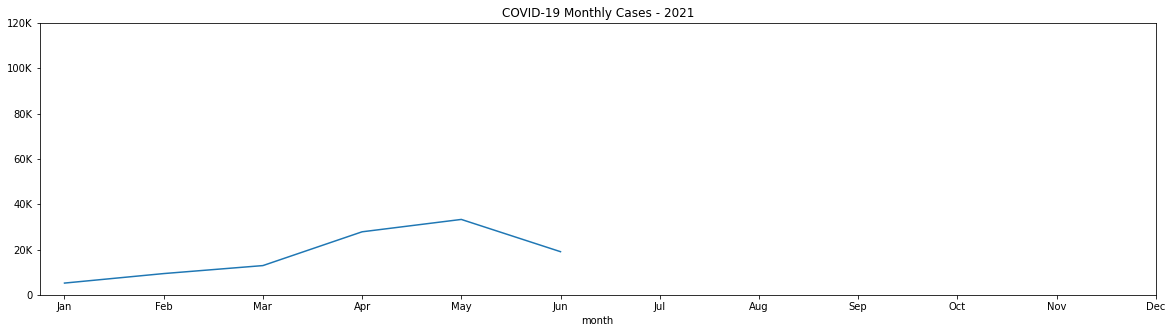

In [37]:
cases[(cases.year == 2021) & (cases.month.notna())].groupby('month').sum()['cases'].sort_index().plot(figsize=(20, 5))
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000], ['0', '20K', '40K', '60K', '80K', '100K', '120K'])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
plt.title("COVID-19 Monthly Cases - 2021")
plt.show()

### Area Plot
> #### Use area plot to draw a Top 5: Total Cases Cities

In [38]:
top_5_city = cases.groupby('city').sum()[['cases']].sort_values(by='cases', ascending=False)[:5].T

In [39]:
top_5_city = top_5_city.append([top_5_city]*5,ignore_index=True)

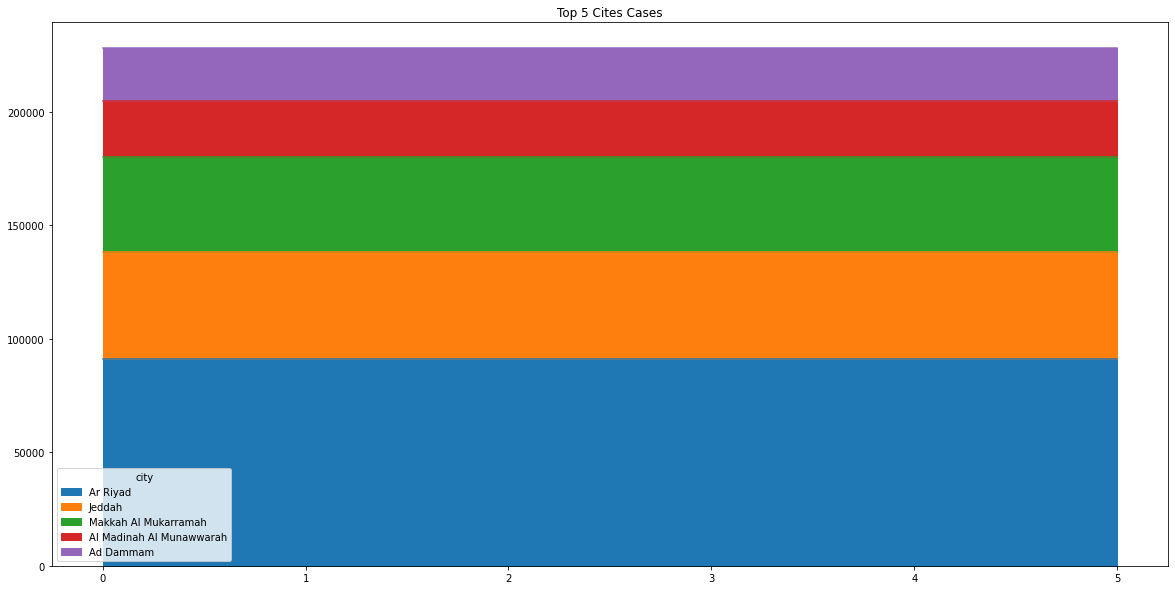

In [40]:
top_5_city.plot(kind='area', figsize=(20, 10))
plt.title('Top 5 Cites Cases')
plt.show()

### Pie Chart
> #### Use Pie chart to draw total cases in regions.

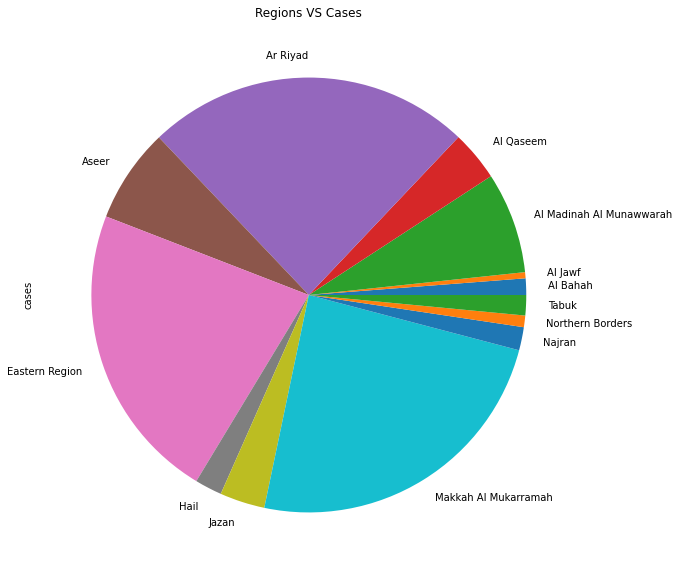

In [41]:
total_cases = cases.groupby('region').sum()[['cases']]
total_cases.plot(kind='pie', y='cases', figsize=(20, 10), legend=False)
plt.title('Regions VS Cases')
plt.show()

### Visualizing Geospatial Data
> #### Use Folium Library to draw total cases in regions.

In [42]:
# read `regions.json` file, contains jps coordinates
gps_json = pd.read_json('regions.json')

In [43]:
# assign `region_cases_en` to regions from te data frame
region_cases_en = cases.groupby('region').sum()[['cases']].to_dict()['cases']

# create a dictionary `regions_ar` to Arabic region names
regions_ar = {
    "Eastern Region": "المنطقة الشرقية",
    "Ar Riyad":"منطقة الرياض",
    "Makkah Al Mukarramah":"منطقة مكة المكرمة",
    "Aseer":"منطقة عسير",
    "Al Qaseem":"منطقة القصيم",
    "Jazan":"منطقة جازان",
    "Al Madinah Al Munawwarah":"منطقة المدينة المنورة",
    "Al Bahah":"منطقة الباحة",
    "Hail":"منطقة حائل",
    "Tabuk":"منطقة تبوك",
    "Najran":"منطقة نجران",
    "Al Jawf":"منطقة الجوف",
    "Northern Borders":"منطقة الحدود الشمالية",
}


In [44]:
# create a dictionary `region_cases_ar` to Arabic & English region names
region_cases_ar = {}
for i in regions_ar:
    region_cases_ar[i] = regions_ar[i]

    
# create a dictionary `jps_ar` contains Arabic region name and jps coordinates
jps_ar = gps_json[['name_ar', 'center']].set_index('name_ar').T.to_dict()

region_ar_en = { k:v for k,v in zip(region_cases_ar.values(), region_cases_ar.keys()) }

# last variable for Arabic region and jps coordinates
center_gps = {}
for i in region_ar_en:
    center_gps[i] = (jps_ar[i]['center'])


In [45]:
region_coordinates = {}
for i in total_cases.to_dict()['cases'].items():
    region_coordinates[i[0]] = [i[0], regions_ar[i[0]], center_gps[regions_ar[i[0]]][0], center_gps[regions_ar[i[0]]][1], region_cases_en[i[0]]]

In [46]:
gps_data_frame = pd.DataFrame(region_coordinates).T

In [47]:
# function for color the icon on map

def color(c):
    if c < 10000:
        return 'green'
    elif c < 50000:
        return 'lightgreen'
    elif c < 100000:
        return 'orange'
    else:
        return 'red'

In [48]:
center = folium.Map(location=[24.7, 46.73333], zoom_start=6, zoom_control=False, scrollWheelZoom=False, dragging=False, tiles='Stamen Terrain')

In [49]:
fg = folium.FeatureGroup(name="regions")


In [50]:
for i in region_coordinates.items():
    
    fg.add_child(folium.Marker(location=[i[1][2], i[1][3]], 
                               popup=folium.Popup(f'{i[1][1]} {i[1][4]} حالة', max_width=len(i[1][1]) * 20), 
                               icon=folium.Icon(color=color(i[1][4]))))
center.add_child(fg)
center

# Word Cloud
> #### Use `wordcloud` Library to draw total cases per city.

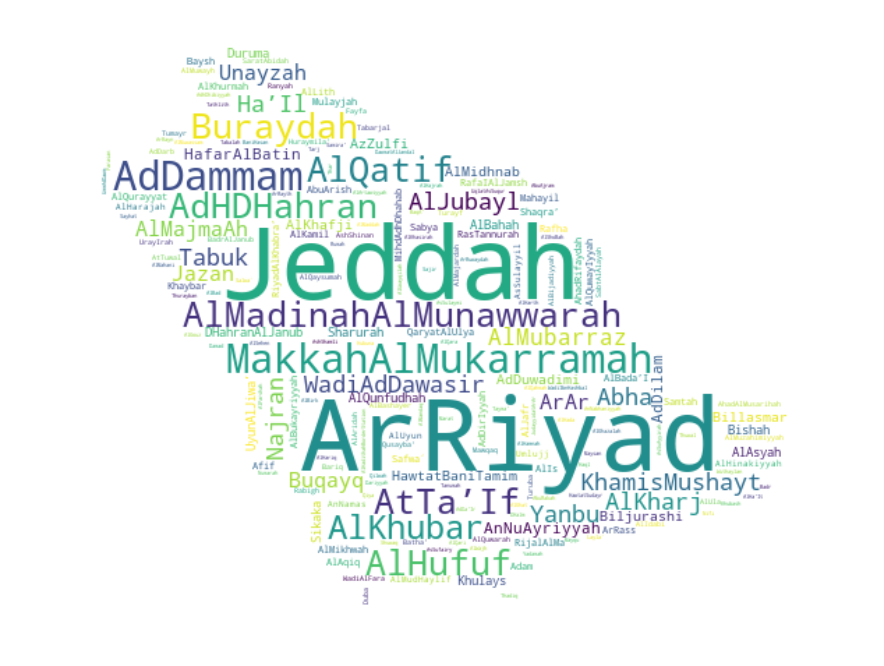

In [51]:
ksa_map = np.array(Image.open(os.path.join("logos/ksa2.png")))
text = cases.city.value_counts().to_dict()
text = {t.replace(' ', '').replace('ʻ', '').replace("'", "").replace('d͟', 'd').replace('D͟', 'D'): i * 20 for t,i in text.items()}



def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    

stopwords = set(STOPWORDS)
stopwords.add("said")
    
# Transform your mask into a new one that will work with the function:
transformed_ksa_map = np.ndarray((ksa_map.shape[0],ksa_map.shape[1]), np.int32)

for i in range(len(ksa_map)):
    transformed_ksa_map[i] = list(map(transform_format, ksa_map[i]))

    
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_ksa_map,
               stopwords=stopwords, contour_width=0, contour_color='firebrick')

# Generate a wordcloud
wc.generate_from_frequencies(text)

# store to file
wc.to_file("logos/ksa3.png")

# show
plt.figure(figsize=[25,12])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
# translate cities to arabic
arabic = {'ArRiyad' : 'الرياض',
 'Jeddah': 'جده',
 'MakkahAlMukarramah': 'مكة المكرمة',
 'AdDammam': 'الدمام',
 'AlMadinahAlMunawwarah': 'المدينة المنورة',
 'AlHufuf': 'الهفوف',
 'AtTaʼIf': 'الطايف',
 'AdHDHahran': 'االظهران',
 'Buraydah': 'بريدة',
 'AlQatif': 'القطيف',
 'AlKhubar': 'الخبر',
 'KhamisMushayt': 'خميس مشيط',
 'Tabuk': 'تبوك',
 'Yanbu': 'ينبع',
 'HaʼIl': 'حائل',
 'AlJubayl': 'الجبيل',
 'Najran': 'نجران',
 'Abha': 'ابها',
 'WadiAdDawasir': 'وادي الدواسر',
 'AlKharj': 'الخرج',
 'AlMubarraz': 'المبرز',
 'Unayzah': 'عنيزة',
 'ArAr': 'عرعر',
 'AlMajmaAh': 'المجمعة',
 'Jazan': 'جازان',
 'Buqayq': 'بقيق',
 'AnNuAyriyyah': 'النعيرية',
 'AdDilam': 'الدلم',
 'HafarAlBatin': 'حفر الباطن',
 'HawtatBaniTamim': 'حوطة بني تميم',
 'AlKhafji': 'الخفجي',
 'AzZulfi': 'الزلفي',
 'Billasmar': 'بللسمر',
 'AdDuwadimi': 'الدوادمي',
 'AlMidhnab': 'المذنب',
 'Biljurashi': 'بلجرشي',
 'AlQunfudhah': 'القنفذة',
 'Bishah': 'بيشة',
 'AlAsyah': 'الاسياح',
 'Sikaka': 'سكاكا',
 'Duruma': 'ضرما',
 'AlBahah': 'الباحة',
 'Khulays': 'خليص',
 'Sharurah': 'شرورة',
 'UyunAlJiwaʼ': 'عين الجواء',
 'QaryatAlUlya': 'قرية العليا',
 'DHahranAlJanub': 'ظهران الجنوب',
 'RiyadAlKhabraʼ': 'رياض الخبراء',
 'AlQurayyat': 'القريات',
 'Afif': 'عفيف',
 'AlJafr': 'الجفر',
 'AlLith': 'الليث',
 'RasTannurah': 'رأس تنورة',
 'AlBadaʼI': 'البدائع',
 'Baysh': 'بيش',
 'RafaIAlJamsh': 'رفائع الجمش',
 'Mahayil': 'محايل عسير',
 'AbuArish': 'ابو عريش',
 'RijalAlMa': 'رجال المع',
 'AlBukayriyyah': 'البكيرية',
 'Mulayjah': 'مليجة',
 'AlMikhwah': 'المخواة',
 'AhadRifaydah': 'احد رفيدة',
 'Khaybar': 'خيبر',
 'AlQuwayIyyah': 'القويعية',
 'AlKhurmah': 'الخرمة',
 'Sabya': 'صبيا',
 'MihdAdhDhahab': 'مهد الذهب',
 'AlKamil': 'الكامل',
 'Samtah': 'صامطة',
 'Adam': 'أضم',
 'ArRass': 'الرس',
 'Safwá': 'صفوى',
 'Rafha': 'رفحاء',
 'AlAqiq': 'العقيق',
 'AlIs': 'العيص',
 'Shaqraʼ': 'شقراء',
 'AdDirIyyah': 'الديرة',
 'AlMudHaylif': 'المظيلف',
 'Umlujj': 'املج',
 'AlHinakiyyah': 'الحناكية',
 'AsSulayyil': 'السليل',
 'AlUyun': 'االعلا',
 'AlHarajah': 'الحرجة',
 'AnNamas': 'النماص',
 'AlMuzahimiyyah': 'المزاحمية',
 'Turayf': 'طريف',
 'Turuba': 'تربه',
 'AdDarb': 'الدرب',
 'Tabarjal': 'طبرجل',
 'AlBashayer': 'البشاير',
 'Fayfa': 'فيفا',
 'AhadAlMusarihah': 'احد المسارحة',
 'AlUla': 'العلا',
 'AlIdabi': 'العيدابي',
 'Huraymilaʼ': 'حريملاء',
 'Qusaybaʼ': 'قصيباء',
 'AtTuwal': 'الطوال',
 'SaratAbidah': 'سراة عبيدة',
 'AlQaysumah': 'القيصومة',
 'AshShinan': 'الشنانة',
 'WadiAlFara': 'وادي الفرع',
 'BadrAlJanub': 'بدر الجنوب',
 'SabtAlAlayah': 'سبت العلايه',
 'Tumayr': 'تمير',
 'Mawqaq': 'موقق',
 'Bariq': 'بارق',
 'AlBijadiyyah': 'البجادية',
 'AlQuwarah': 'القوارة',
 'AlAridah': 'العارضة',
 'AlMajardah': 'المجاردة',
 'Duba': 'ضبا',
 'Bathaʼ': 'بطحاء',
 'Ranyah': 'رنية',
 'UrayIrah': 'عريعرة',
 'AlMuwayh': 'المويه',
 'Rabigh': 'رابغ',
 'HawtatSudayr': 'حوطة سدير',
 'Tabalah': 'تبالة',
 'Tathlith': 'تثليث',
 'Yadamah': 'يدمه',
 'Sajir': 'ساجر',
 'AlMandaq': 'المندق',
 'AlQari': 'القري',
 'DawmatAlJandal': 'دومة الجندل',
 'AlQahmah': 'القحمة',
 'Qilwah': 'قلوة',
 'ArRuwaydah': '',
 'AlGouz': 'القوز',
 'ArRayth': 'الريث',
 'AlBad': '',
 'AlHajrah': 'الحجرة',
 'AshShamli': 'الشملي',
 'Laylá': 'ليلى',
 'AlHaʼIt': 'الحائط',
 'BaqAʼ': 'بقعاء',
 'AlArtawiyyah': 'الارطاوية',
 'UqlatAsSuqur': 'عقلة الصقور',
 'Thurayban': 'ثريبان',
 'AlGhazalah': 'الغزالة',
 'Numarah': 'نمره',
 'AlMaddah': '',
 'Hubuna': 'حبونا',
 'AdDaʼIr': 'الداير',
 'Dariyyah': '',
 'AlBirk': 'البرك',
 'AnNabhaniyyah': 'النبهانية',
 'Khubash': '',
 'Thadiq': 'ثادق',
 'Rumah': 'رماح',
 'UmmAdDawm': 'ام الدوم',
 'AlHamnah': '',
 'AlQara': 'القرى',
 'Haql': 'حقل',
 'AlWajh': 'الوجه',
 'Taymaʼ': 'تيماء',
 'Qiya': 'قيا',
 'ArRayn': '',
 'AlFarshah': 'الفرشه',
 'AlSehen': '',
 'Tanumah': 'تنومه',
 'AlShoBah': '',
 'WadiIbnHashbal': 'وادي بن هشبل',
 'AlHadithahBorderStation': 'الحديثة',
 'AlMuwassam': 'الموسم',
 'AlHarth': 'الحرث',
 'AbuRakah': 'ابو راكه',
 'Damad': 'ضمد',
 'Samiraʼ': 'سميرة',
 'Marat': 'مرات',
 'DHalm': 'ضلم',
 'Farasan': 'فرسان',
 'Badr': 'بدر',
 'Maysan': 'ميسان',
 'Wuthaylan': 'وثيلان',
 'Salwá': 'سلوى',
 'AlMahani': 'المحاني',
 'AlKhasirah': 'الخاصرة',
 'AlHariq': 'الحريق',
 'AlUwayqilah': '',
 'Thuwal': 'ثول',
 'BaniHasan': 'بني حسن',
 'AsSuAyyirah': '',
 'Tarj': 'ترج',
 'AlGhat': 'الغاط',
 'Thar': 'ثار',
 'AsSulaymi': 'السليمي',
 'Shuwaq': 'الشواق',
 'AdhDhibiyyah': '',
 'Sayhat': 'سيهات',
 'AbuAjram': 'أبو عجرم',
 'AlHada': 'الهدا',
 'Nifi': 'نفي',
 'Mayqu': 'ميقوع',
 'JudayyidatArAr': 'جديدة عرعر',
 'AsSufairy': 'الصفيري',
 'Hadda': 'حدة',
 'HazmAlJalamid': 'حزم الجلاميد',
 'Suwayr': 'صوير',
 'ArRuqI': 'الرقه',
 'AbuUrwah': 'ابو عروة',
 'Harad': 'حرض',
 'AsSulaymaniyyah': 'السليمانية',
 'HadadBaniMalik': 'حداد بني ماالك',
 'AlHadban': 'الحدبان',
 'Samudah': 'سامودة'}


In [53]:
# make dictionary for arabic city and cases
cases_arabic_city = {}
cases_arabic_only_city = {}
for i in text:
    cases_arabic_city[i] = [i, arabic[i], text[i]]
    cases_arabic_only_city[arabic[i]] = text[i]


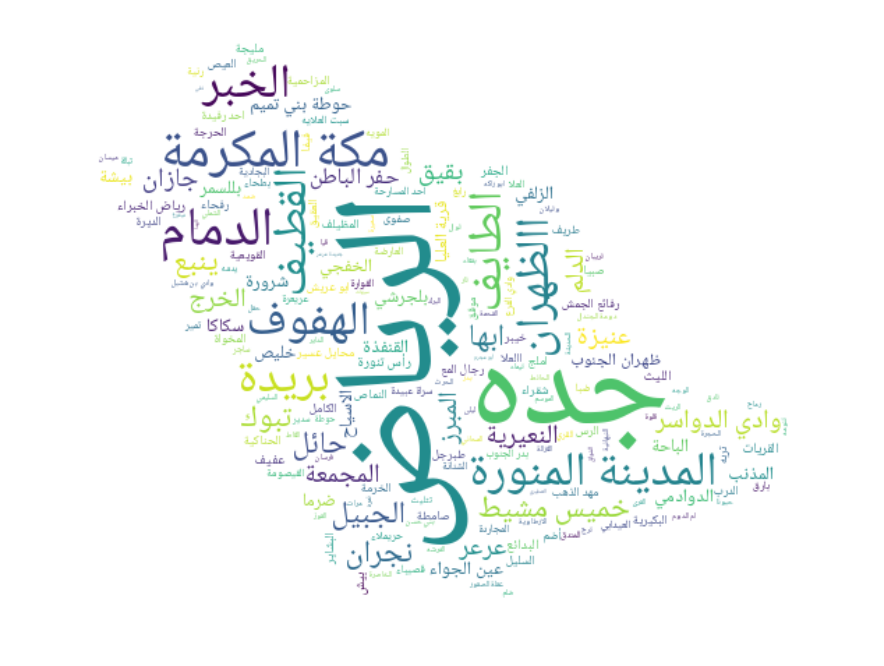

In [54]:
# -*- coding: utf-8 -*-

ksa_map = np.array(Image.open(os.path.join("logos/ksa2.png")))
text_1 = cases_arabic_only_city
text_1 = {get_display(arabic_reshaper.reshape(t)): i * 20 for t,i in text_1.items()}




# Transform your mask into a new one that will work with the function:
transformed_ksa_map = np.ndarray((ksa_map.shape[0],ksa_map.shape[1]), np.int32)

for i in range(len(ksa_map)):
    transformed_ksa_map[i] = list(map(transform_format, ksa_map[i]))

    
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_ksa_map,
               stopwords=stopwords, contour_width=0, contour_color='firebrick', font_path='logos/NotoNaskhArabic-Regular.ttf')

# Generate a wordcloud
wc.generate_from_frequencies(text_1)

# store to file
wc.to_file("logos/ksa4.png")

# show
plt.figure(figsize=[25,12])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()